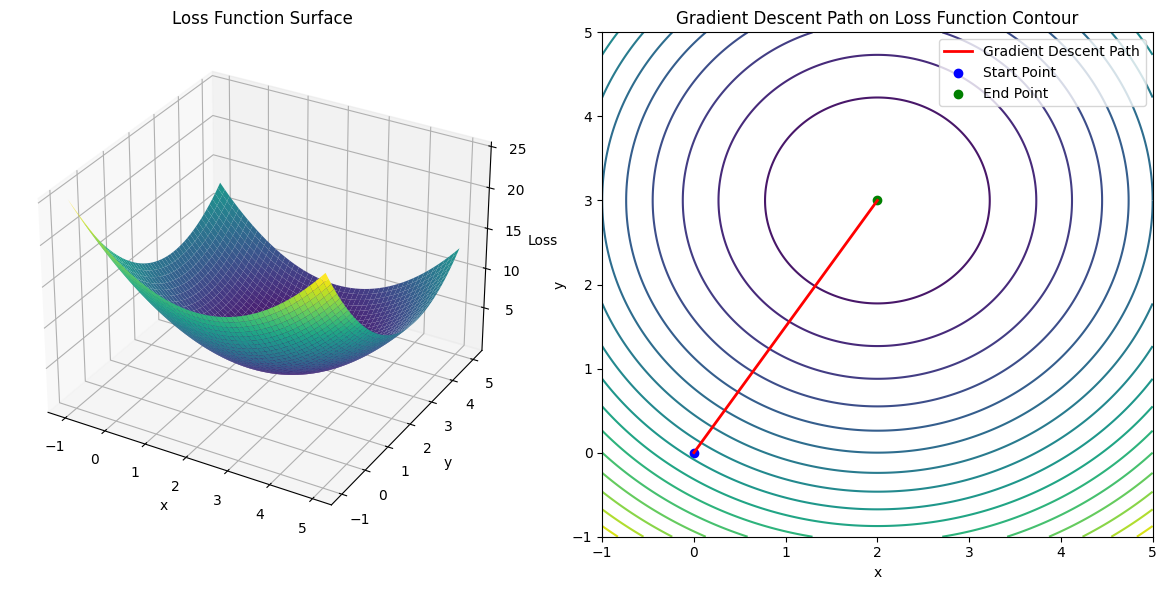

In [3]:
# 1. 梯度下降

import numpy as np
import matplotlib.pyplot as plt

# 损失函数定义
def loss_function(x, y):
    return (x - 2)**2 + (y - 3)**2

# 梯度计算
# 定义损失函数的梯度  
def gradient(x, y):  
    grad_x = 2 * (x - 2)  
    grad_y = 2 * (y - 3)  
    return grad_x, grad_y

# 初始化起始点和学习率；在每次迭代中，根据当前点的梯度更新坐标
def gradient_descent(initial_point, learning_rate, num_iterations):  
    x, y = initial_point
    trajectory = [(x, y)]  # 记录梯度下降过程中的点  
    for _ in range(num_iterations):  
        grad_x, grad_y = gradient(x, y)  
        x -= learning_rate * grad_x  
        y -= learning_rate * grad_y  
        trajectory.append((x, y))  # 记录每一步的坐标，以便后续可视化
    return trajectory

# 定义初始条件，执行梯度下降
initial_point = (0, 0)  # 起始点  
learning_rate = 0.1  # 学习率  
num_iterations = 50  # 迭代次数
trajectory = gradient_descent(initial_point, learning_rate, num_iterations)

# 转换为numpy数组以便绘图
trajectory = np.array(trajectory)  

# 创建网格以绘制损失函数的曲面  
x_vals = np.linspace(-1, 5, 400)  
y_vals = np.linspace(-1, 5, 400)  
X, Y = np.meshgrid(x_vals, y_vals)  
Z = loss_function(X, Y) 

# 可视化结果
# 绘制损失函数的曲面
fig = plt.figure(figsize=(12, 6))  

ax1 = fig.add_subplot(121, projection='3d')  
ax1.plot_surface(X, Y, Z, cmap='viridis')  
ax1.set_title('Loss Function Surface')  
ax1.set_xlabel('x')  
ax1.set_ylabel('y')  
ax1.set_zlabel('Loss')  
  
# 绘制梯度下降的路径  
ax2 = fig.add_subplot(122)  
ax2.contour(X, Y, Z, levels=20, cmap='viridis')  
ax2.plot(trajectory[:, 0], trajectory[:, 1], 'r-', linewidth=2, label='Gradient Descent Path')  
ax2.scatter(trajectory[0, 0], trajectory[0, 1], color='blue', label='Start Point')  
ax2.scatter(trajectory[-1, 0], trajectory[-1, 1], color='green', label='End Point')  
ax2.set_title('Gradient Descent Path on Loss Function Contour')  
ax2.set_xlabel('x')  
ax2.set_ylabel('y')  
ax2.legend()  

# 显示图形  
plt.tight_layout()  
plt.show()

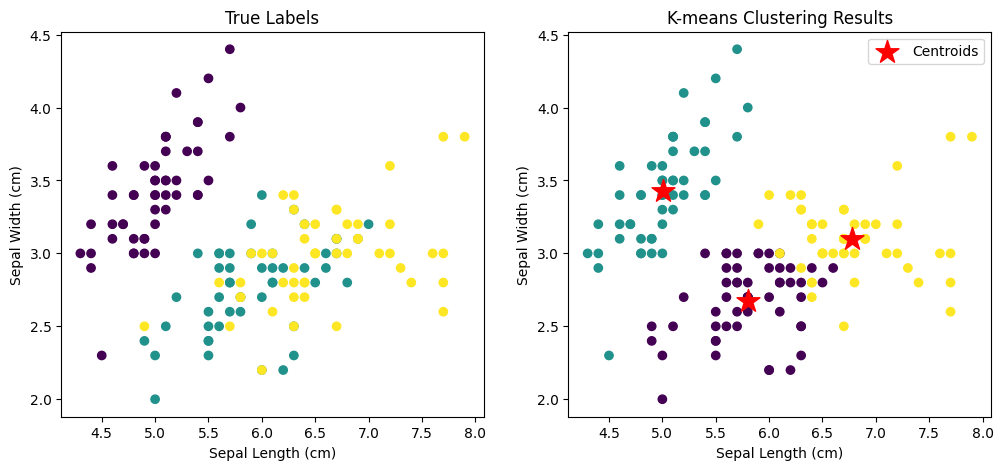

Clustering Accuracy: 0.24
Adjusted Rand Index: 0.62
Silhouette Score: 0.51

Composition of Cluster 0:
  setosa: 0
  versicolor: 39
  virginica: 14

Composition of Cluster 1:
  setosa: 50
  versicolor: 0
  virginica: 0

Composition of Cluster 2:
  setosa: 0
  versicolor: 11
  virginica: 36

Confusion Matrix:
[[ 0 50  0]
 [39  0 11]
 [14  0 36]]


In [6]:
# 2. 聚类 K-means

from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score, confusion_matrix
import matplotlib.pyplot as plt

# 加载数据集
iris = datasets.load_iris()
X = iris.data    # X包含特征数据（萼片和花瓣的长度和宽度）
y = iris.target  # y包含真实的类别标签

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 模型创建与训练
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # 指定 n_init
kmeans.fit(X_scaled)

# 模型预测
y_kmeans = kmeans.predict(X_scaled)

# 可视化方法进行模型评估
plt.figure(figsize=(12, 5))

# 原始数据的真实类别
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('True Labels')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# K-means聚类的结果
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
# 绘制聚类中心
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)  # 标注化逆变换回原始空间
plt.scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1], 
            s=300, c='red', marker='*', label='Centroids')
plt.title('K-means Clustering Results')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# 计算聚类的准确率
accuracy = accuracy_score(y, y_kmeans)
print(f"Clustering Accuracy: {accuracy:.2f}")
# 使用调整兰德指数评估
ari = adjusted_rand_score(y, y_kmeans)
print(f"Adjusted Rand Index: {ari:.2f}")
# 轮廓系数评估
sil = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil:.2f}")

# 分析簇的组成
for i in range(3):
    cluster = np.where(y_kmeans == i)[0]
    print(f"\nComposition of Cluster {i}:")
    for iris_type in range(3):
        count = np.sum(y[cluster] == iris_type)
        print(f"  {iris.target_names[iris_type]}: {count}")

# 增加混淆矩阵
conf_mat = confusion_matrix(y, y_kmeans)
print(f"\nConfusion Matrix:\n{conf_mat}")

In [7]:
# 3. 降维

from sklearn import datasets
from sklearn.decomposition import PCA

# 数据加载
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 分析主成分
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# 分析主成分的组成
print("主成分的特征向量:")
for i, component in enumerate(pca.components_):
    print(f"PC{i+1}: {component}")

print("\n原始特征与主成分的相关性:")
for i, component in enumerate(pca.components_):
    correlations = component * np.sqrt(pca.explained_variance_[i])
    print(f"PC{i+1}:")
    for j, corr in enumerate(correlations):
        print(f"  {iris.feature_names[j]}: {corr:.3f}")

Explained Variance Ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
主成分的特征向量:
PC1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
PC2: [0.37741762 0.92329566 0.02449161 0.06694199]
PC3: [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
PC4: [-0.26128628  0.12350962  0.80144925 -0.52359713]

原始特征与主成分的相关性:
PC1:
  sepal length (cm): 0.893
  sepal width (cm): -0.462
  petal length (cm): 0.995
  petal width (cm): 0.968
PC2:
  sepal length (cm): 0.362
  sepal width (cm): 0.886
  petal length (cm): 0.023
  petal width (cm): 0.064
PC3:
  sepal length (cm): 0.277
  sepal width (cm): -0.094
  petal length (cm): -0.055
  petal width (cm): -0.244
PC4:
  sepal length (cm): -0.038
  sepal width (cm): 0.018
  petal length (cm): 0.116
  petal width (cm): -0.076


Running comprehensive tests with bin capacity 50...

Average performance metrics:

First-Fit:
  Bins used: 959.1 ± 932.0
  Time: 0.1433s ± 0.1915
  Space efficiency: 94.77%

Next-Fit:
  Bins used: 1225.4 ± 1202.4
  Time: 0.0004s ± 0.0004
  Space efficiency: 75.64%

Best-Fit:
  Bins used: 949.5 ± 923.6
  Time: 0.1719s ± 0.2276
  Space efficiency: 95.79%

Worst-Fit:
  Bins used: 1077.3 ± 1055.7
  Time: 0.2056s ± 0.2726
  Space efficiency: 85.80%


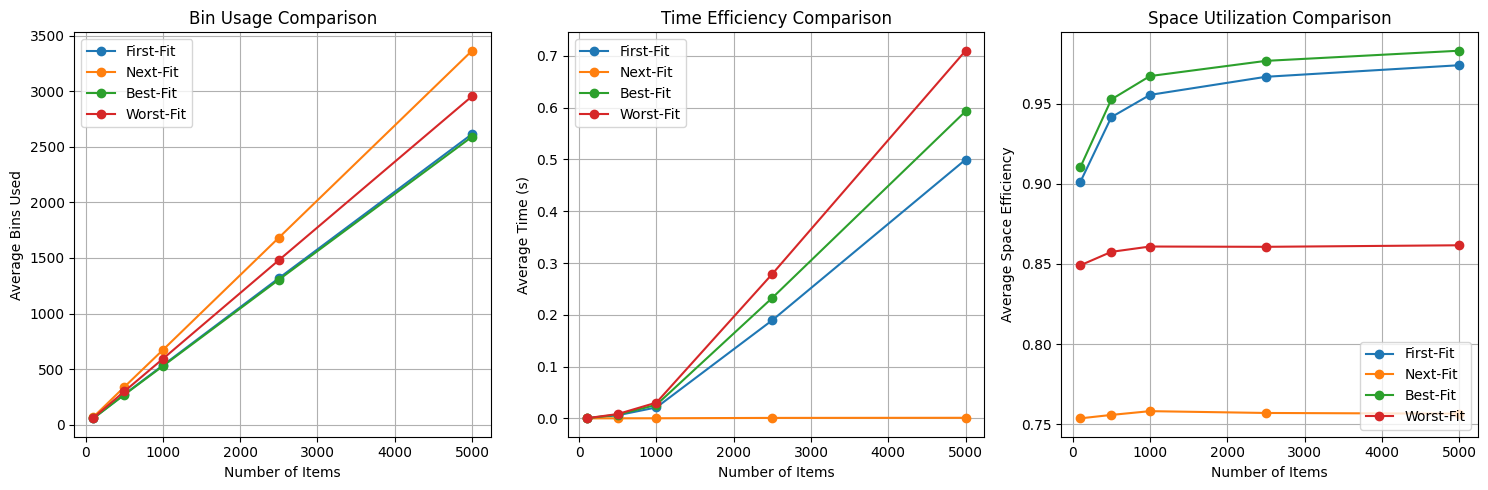

In [11]:
# 4. 装箱子

import random
import time
import matplotlib.pyplot as plt
import numpy as np

def first_fit(items, bin_capacity=10):
    """First-Fit算法：检查所有箱子，第一个能放下的就放入"""
    bins = []
    for item in items:
        placed = False
        for bin in bins:
            if sum(bin) + item <= bin_capacity:
                bin.append(item)
                placed = True
                break
        if not placed:
            bins.append([item])
    return bins

def next_fit(items, bin_capacity=10):
    """Next-Fit算法：只检查最后一个箱子，放不下就开新箱子"""
    bins = []
    if not items:
        return bins
    current_bin = [items[0]]
    bins.append(current_bin)
    for item in items[1:]:
        if sum(current_bin) + item <= bin_capacity:
            current_bin.append(item)
        else:
            current_bin = [item]
            bins.append(current_bin)
    return bins

def best_fit(items, bin_capacity=10):
    """Best-Fit算法：选择能放下且剩余空间最小的箱子"""
    bins = []
    for item in items:
        best_bin = None
        min_space = bin_capacity + 1  # 初始化为比容量大的值
        for bin in bins:
            space = bin_capacity - sum(bin)
            if space >= item and space < min_space:
                best_bin = bin
                min_space = space
        if best_bin is not None:
            best_bin.append(item)
        else:
            bins.append([item])
    return bins

def worst_fit(items, bin_capacity=10):
    """Worst-Fit算法：选择能放下且剩余空间最大的箱子"""
    bins = []
    for item in items:
        worst_bin = None
        max_space = -1  # 初始化为比最小可能值小的数
        for bin in bins:
            space = bin_capacity - sum(bin)
            if space >= item and space > max_space:
                worst_bin = bin
                max_space = space
        if worst_bin is not None:
            worst_bin.append(item)
        else:
            bins.append([item])
    return bins

def generate_items(n, min_size=1, max_size=30):
    """生成指定范围的随机物品"""
    return [random.randint(min_size, max_size) for _ in range(n)]

def evaluate_algorithms(items, bin_capacity):
    """评估各算法在相同物品集上的表现"""
    algorithms = {
        "First-Fit": first_fit,
        "Next-Fit": next_fit,
        "Best-Fit": best_fit,
        "Worst-Fit": worst_fit
    }
    
    results = {}
    for name, algo in algorithms.items():
        start_time = time.perf_counter()
        bins = algo(items, bin_capacity)
        elapsed = time.perf_counter() - start_time
        results[name] = {
            "bins": len(bins),
            "time": elapsed,
            "efficiency": sum(items) / (len(bins) * bin_capacity)
        }
    return results

def run_comprehensive_tests(num_trials=100, item_counts=None, bin_capacity=50):
    """运行综合测试并收集统计数据"""
    if item_counts is None:
        item_counts = [100, 500, 1000, 2000, 5000]
    
    # 初始化数据存储结构
    stats = {
        "counts": item_counts,
        "data": {
            "First-Fit": {"bins": [], "time": [], "efficiency": []},
            "Next-Fit": {"bins": [], "time": [], "efficiency": []},
            "Best-Fit": {"bins": [], "time": [], "efficiency": []},
            "Worst-Fit": {"bins": [], "time": [], "efficiency": []}
        }
    }
    
    for n in item_counts:
        trial_results = {algo: [] for algo in stats["data"]}
        time_results = {algo: [] for algo in stats["data"]}
        efficiency_results = {algo: [] for algo in stats["data"]}
        
        for _ in range(num_trials):
            items = generate_items(n, max_size=bin_capacity)
            results = evaluate_algorithms(items, bin_capacity)
            
            for algo, data in results.items():
                trial_results[algo].append(data["bins"])
                time_results[algo].append(data["time"])
                efficiency_results[algo].append(data["efficiency"])
        
        # 计算平均值
        for algo in stats["data"]:
            stats["data"][algo]["bins"].append(np.mean(trial_results[algo]))
            stats["data"][algo]["time"].append(np.mean(time_results[algo]))
            stats["data"][algo]["efficiency"].append(np.mean(efficiency_results[algo]))
    
    return stats

def plot_results(stats):
    """绘制算法性能对比图"""
    plt.figure(figsize=(15, 5))
    
    # 绘制箱子数量对比
    plt.subplot(1, 3, 1)
    for algo, data in stats["data"].items():
        plt.plot(stats["counts"], data["bins"], marker='o', label=algo)
    plt.xlabel("Number of Items")
    plt.ylabel("Average Bins Used")
    plt.title("Bin Usage Comparison")
    plt.grid(True)
    plt.legend()
    
    # 绘制时间效率对比
    plt.subplot(1, 3, 2)
    for algo, data in stats["data"].items():
        plt.plot(stats["counts"], data["time"], marker='o', label=algo)
    plt.xlabel("Number of Items")
    plt.ylabel("Average Time (s)")
    plt.title("Time Efficiency Comparison")
    plt.grid(True)
    plt.legend()
    
    # 绘制空间利用率对比
    plt.subplot(1, 3, 3)
    for algo, data in stats["data"].items():
        plt.plot(stats["counts"], data["efficiency"], marker='o', label=algo)
    plt.xlabel("Number of Items")
    plt.ylabel("Average Space Efficiency")
    plt.title("Space Utilization Comparison")
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def main():
    # 测试参数配置
    bin_capacity = 50  # 箱子容量
    test_config = {
        "num_trials": 50,
        "item_counts": [100, 500, 1000, 2500, 5000],
        "bin_capacity": bin_capacity
    }
    
    print(f"Running comprehensive tests with bin capacity {bin_capacity}...")
    stats = run_comprehensive_tests(
        num_trials=test_config["num_trials"],
        item_counts=test_config["item_counts"],
        bin_capacity=test_config["bin_capacity"]
    )
    
    print("\nAverage performance metrics:")
    for algo, data in stats["data"].items():
        print(f"\n{algo}:")
        print(f"  Bins used: {np.mean(data['bins']):.1f} ± {np.std(data['bins']):.1f}")
        print(f"  Time: {np.mean(data['time']):.4f}s ± {np.std(data['time']):.4f}")
        print(f"  Space efficiency: {np.mean(data['efficiency']):.2%}")
    
    plot_results(stats)

if __name__ == "__main__":
    main()

In [12]:
# 5. 用动态规划实现斐波那契数列求解

# 教材给出的方法
def fibonacci_book(n):
    if n <= 1:
        return n
    # 创建DP数组来存储已计算的斐波那契数
    dp = [0] * (n + 1)
    dp[1] = 1  # 基本情况
    for i in range(2, n + 1):
        dp[i] = dp[i - 1] + dp[i - 2]  # 状态转移方程
    return dp[n]

# AI 生成的空间复杂度优化方法
def fibonacci(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

# 测试程序
if __name__ == "__main__":
    # 定义要计算的斐波那契数的位置
    n = 676
    # 调用函数计算
    result = fibonacci(n)
    print(f"第{n}个斐波那契数是: {result}")

第676个斐波那契数是: 843645135740916443113832571217701196011659994669538939065731942674862905397433979715931741959073525236305000074026438339415322804865241443907


In [61]:
# 6. 八数码

import heapq
import time
import os
import random
from copy import deepcopy

# 目标状态：数字按顺序连成一圈，空格在中心
GOAL_STATE = [
    [1, 2, 3],
    [8, 0, 4],
    [7, 6, 5]
]

# 单个状态最大求解时间（秒）
MAX_SOLVE_TIME = 0.8

class PuzzleNode:
    def __init__(self, state, parent=None, move=None, depth=0):
        self.state = state
        self.parent = parent
        self.move = move
        self.depth = depth
        self.cost = self.depth + self.heuristic()
        # 预计算哈希值提高性能
        self._hash = hash(tuple(tuple(row) for row in self.state))
    
    def __lt__(self, other):
        return self.cost < other.cost
    
    def __eq__(self, other):
        return self._hash == other._hash
    
    def __hash__(self):
        return self._hash
    
    def heuristic(self):
        # 曼哈顿距离启发式函数
        distance = 0
        for i in range(3):
            for j in range(3):
                num = self.state[i][j]
                if num != 0:
                    # 预定义目标位置提高性能
                    goal_positions = {
                        1: (0, 0), 2: (0, 1), 3: (0, 2),
                        8: (1, 0), 0: (1, 1), 4: (1, 2),
                        7: (2, 0), 6: (2, 1), 5: (2, 2)
                    }
                    goal_i, goal_j = goal_positions[num]
                    distance += abs(i - goal_i) + abs(j - goal_j)
        return distance
    
    def is_goal(self):
        return self._hash == GOAL_HASH
    
    def get_blank_pos(self):
        for i in range(3):
            for j in range(3):
                if self.state[i][j] == 0:
                    return (i, j)
    
    def get_children(self):
        children = []
        blank_i, blank_j = self.get_blank_pos()
        
        # 可能的移动方向：上、下、左、右
        moves = [
            (-1, 0, '↑'),
            (1, 0, '↓'),
            (0, -1, '←'),
            (0, 1, '→')
        ]
        
        for di, dj, move_name in moves:
            new_i, new_j = blank_i + di, blank_j + dj
            if 0 <= new_i < 3 and 0 <= new_j < 3:
                new_state = deepcopy(self.state)
                # 交换空白格和相邻数字
                new_state[blank_i][blank_j], new_state[new_i][new_j] = \
                    new_state[new_i][new_j], new_state[blank_i][blank_j]
                children.append(PuzzleNode(new_state, self, move_name, self.depth + 1))
        
        return children
    
    def get_path(self):
        path = []
        node = self
        while node:
            path.append(node)
            node = node.parent
        return path[::-1]  # 反转路径，从开始到结束

# 预计算目标状态的哈希值
GOAL_HASH = hash(tuple(tuple(row) for row in GOAL_STATE))

def generate_random_state():
    """生成一个随机的可解初始状态"""
    while True:
        numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8]
        random.shuffle(numbers)
        state = [numbers[i*3:(i+1)*3] for i in range(3)]
        if is_solvable(state):
            return state

def is_solvable(state):
    """检查状态是否可解"""
    # 将状态展平为一维列表（忽略0）
    flat = [num for row in state for num in row if num != 0]
    
    # 计算逆序数
    inversions = 0
    for i in range(len(flat)):
        for j in range(i + 1, len(flat)):
            if flat[i] > flat[j]:
                inversions += 1
    
    # 找到空白格的行数（从下往上数）
    blank_row = 3 - next(i for i in range(3) if 0 in state[i])
    
    # 可解性条件
    return (inversions % 2 == 0) == (blank_row % 2 == 1)

def solve_puzzle(initial_state):
    """使用A*算法求解八数码问题，带超时机制"""
    start_time = time.time()
    start_node = PuzzleNode(initial_state)
    
    if start_node.is_goal():
        return [start_node]
    
    open_set = []
    heapq.heappush(open_set, start_node)
    closed_set = set()
    explored_count = 0
    
    while open_set:
        if time.time() - start_time > MAX_SOLVE_TIME:  # 超时检查
            return None
        
        current_node = heapq.heappop(open_set)
        
        if current_node.is_goal():
            print(f"\n探索了 {explored_count} 个状态后找到解决方案")
            return current_node.get_path()
        
        closed_set.add(current_node)
        explored_count += 1
        
        for child in current_node.get_children():
            if child in closed_set:
                continue
            
            found = False
            for node in open_set:
                if node == child and node.cost > child.cost:
                    node.cost = child.cost
                    node.parent = child.parent
                    node.move = child.move
                    found = True
                    break
            
            if not found:
                heapq.heappush(open_set, child)
    
    return None

def print_state(state, move=None):
    """打印当前状态"""
    if move:
        print(f"移动: {move}")
    print("+" + "---+" * 3)
    for row in state:
        print("|", end="")
        for num in row:
            if num == 0:
                print("   |", end="")
            else:
                print(f" {num} |", end="")
        print()
        print("+" + "---+" * 3)
    print()

def animate_solution(path):
    """展示解决方案"""
    for i, node in enumerate(path):
        os.system('cls' if os.name == 'nt' else 'clear')
        print(f"八数码问题求解 - 步骤 {i}")
        if i == 0:
            print("初始状态:")
        print_state(node.state, node.move if i > 0 else None)

def main():
    print("八数码问题求解器 - 随机初始状态")
    print("目标状态:")
    print_state(GOAL_STATE)
    
    while True:  # 新增循环机制
        initial_state = generate_random_state()
        print("正在求解新随机生成的初始状态...")
        start_time = time.time()
        solution_path = solve_puzzle(initial_state)
        end_time = time.time()
        
        if solution_path:
            print(f"\n找到可解的初始状态，解决方案共需要 {len(solution_path)-1} 步")
            print(f"求解耗时: {end_time - start_time:.2f}秒")
            animate_solution(solution_path)
            break
        else:
            print(f"\n当前状态超时未解（{end_time - start_time:.2f}秒），重新生成状态...")

if __name__ == "__main__":
    main()

八数码问题求解器 - 随机初始状态
目标状态:
+---+---+---+
| 1 | 2 | 3 |
+---+---+---+
| 8 |   | 4 |
+---+---+---+
| 7 | 6 | 5 |
+---+---+---+

正在求解新随机生成的初始状态...

当前状态超时未解（0.81秒），重新生成状态...
正在求解新随机生成的初始状态...

探索了 967 个状态后找到解决方案

找到可解的初始状态，解决方案共需要 23 步
求解耗时: 0.17秒
八数码问题求解 - 步骤 0
初始状态:
+---+---+---+
| 7 | 3 | 8 |
+---+---+---+
| 5 | 2 |   |
+---+---+---+
| 1 | 4 | 6 |
+---+---+---+
八数码问题求解 - 步骤 1
移动: ↑
+---+---+---+
| 7 | 3 |   |
+---+---+---+
| 5 | 2 | 8 |
+---+---+---+
| 1 | 4 | 6 |
+---+---+---+

八数码问题求解 - 步骤 2
移动: ←
+---+---+---+
| 7 |   | 3 |
+---+---+---+
| 5 | 2 | 8 |
+---+---+---+
| 1 | 4 | 6 |
+---+---+---+

八数码问题求解 - 步骤 3
移动: ↓
+---+---+---+
| 7 | 2 | 3 |
+---+---+---+
| 5 |   | 8 |
+---+---+---+
| 1 | 4 | 6 |
+---+---+---+

八数码问题求解 - 步骤 4
移动: →
+---+---+---+
| 7 | 2 | 3 |
+---+---+---+
| 5 | 8 |   |
+---+---+---+
| 1 | 4 | 6 |
+---+---+---+

八数码问题求解 - 步骤 5
移动: ↓
+---+---+---+
| 7 | 2 | 3 |
+---+---+---+
| 5 | 8 | 6 |
+---+---+---+
| 1 | 4 |   |
+---+---+---+

八数码问题求解 - 步骤 6
移动: ←
+---+---+---+
| 7 

In [59]:
# 7. 用回溯法实现n皇后问题求解

# N 皇后问题求解函数
def solve_n_queens(n):
    def is_safe(board, row, col):
        # 检查同一列
        for i in range(row):
            if board[i] == col:
                return False
            # 检查对角线
            if abs(board[i] - col) == abs(i - row):
                return False
        return True
    
    def backtrack(row):
        if row == n:
            solutions.append(board[:])
            # 如果是第一个解，立即打印
            if len(solutions) == 1:
                print("找到第一个解决方案：")
                print_solution(board[:])
            return
        for col in range(n):
            if is_safe(board, row, col):
                board[row] = col
                backtrack(row + 1)
                board[row] = -1
    
    solutions = []
    board = [-1] * n
    backtrack(0)
    return solutions

def print_solution(solution):
    n = len(solution)
    if n < 4 or n > 8:  # 只有 n 在 4~8 才打印棋盘
        print("坐标：")
        print([(row, col) for row, col in enumerate(solution)])
    else:
        print("坐标：")
        print([(row, col) for row, col in enumerate(solution)])
        print("棋盘：")
        # 顶部边框
        print("┌" + "───┬" * (n-1) + "───┐")
        for row in range(n):
            line = "│"
            for col in range(n):
                if solution[row] == col:
                    line += " ♛ │"
                else:
                    line += "   │"
            print(line)
            # 行间分隔线（最后一行除外）
            if row < n - 1:
                print("├" + "───┼" * (n-1) + "───┤")
        # 底部边框
        print("└" + "───┴" * (n-1) + "───┘")
    print()

def main():
    n = 8  # 可以修改这里的n值来测试不同大小的棋盘
    solutions = solve_n_queens(n)
    print(f"{n} 皇后问题，找到 {len(solutions)} 种解决方案")

if __name__ == "__main__":
    main()

找到第一个解决方案：
坐标：
[(0, 0), (1, 4), (2, 7), (3, 5), (4, 2), (5, 6), (6, 1), (7, 3)]
棋盘：
┌───┬───┬───┬───┬───┬───┬───┬───┐
│ ♛ │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │ ♛ │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ ♛ │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │ ♛ │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │ ♛ │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │ ♛ │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │ ♛ │   │   │   │   │
└───┴───┴───┴───┴───┴───┴───┴───┘

8 皇后问题，找到 92 种解决方案


# 思路总结

## 1. 梯度下降
梯度下降算法从初始点 `(0, 0)` 开始，以 0.1 的学习率迭代 50 次后收敛到了最小值点 `(2, 3)` 附近。可视化的曲面展示了二维平面上各个点的 `loss` 值，最低点即函数的最小值点 `(2, 3)`；等高线图展现了优化路径的走向，初始点 `(0,0)` 到终点 `(2,3)` 的红色轨迹验证了算法有效性。

## 2. 聚类
首先直接运行模版样例给出的原始代码，发现聚类效果并不理想：
- versicolor 和 virginica 两类几乎完全混在一起（都主要被分到簇0）
- setosa 类被分成两个簇（1和2）
- K-means在这个数据集上能分离 setosa（虽然分成两个簇），但无法区分 versicolor 和 virginica

仔细观察实验文档模版代码运行的结果，发现三个问题：
1. 聚类效果不理想，没有达到 PPT 上的预期效果
2. 输出的准确率（accuracy_score）很低
3. 聚类结果的可视化图表形状很奇怪，聚类中心离数据点的位置很远

分析问题背景、代码细节，并结合该题目的历史背景，查阅资料后，我找到了以下原因，并分别解决了问题：
1. **修正历史库版本问题**

    注意到，这个鸢尾花聚类问题较为经典，推测其最早作为聚类分析案例的时候使用的还是旧版算法库，因此我尝试降低版本，使用 `sklearn 1.3` 版本运行 `KMeans` ，果然达到了 PPT 以及上课展示的预期结果，同时出现以下警告：
    ```shell
   FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
    ```
    根据警告信息，1.4 以后版本的 `sklearn` 中，`KMeans` 的默认参数 `n_init` 从原来的 `10` 改为了 `'auto'`，因此我在新版 `sklearn 1.6.1` 中调用 `KMeans` 时，显式指定 `n_init=10`，得到了预期（与课堂展示相同）的聚类结果。

   > 查阅资料发现：在 scikit-learn 的 KMeans 算法中，参数 n_init 指的是算法将运行的次数，每一次运行都会使用不同的质心初始化。每次使用不同的初始质心来运行KMeans算法，最终的结果将是这些多次运行中最好的一次。
   >   
   > 这样做是为了增加找到全局最优解的机会，而不是陷入局部最优解。因为 KMeans 算法对初始质心的选择相当敏感，不同的初始质心可能导致不同的聚类结果。


2. **调整评估指标**
   - 实验文档给出的示例代码使用 `accuracy_score` 评估 KMeans 聚类结果，然而聚类是无监督学习，其生成的标签与原始数据的真实标签可能不匹配，导致即使聚类效果良好，准确性评分也可能为 0。在鸢尾花数据集中，尽管 KMeans 可能正确识别了所有簇，但由于簇编号和真实标签编号可能不一致，直接比较会导致准确率一直很低。
   - 因此我改用课堂上讲的调整兰德指数和轮廓系数来评估聚类效果。调整兰德指数能有效衡量聚类结果与真实标签之间的一致性，而轮廓系数则帮助评估簇内部的紧密度和簇间的分离度。这两种方法提供了对聚类质量更准确的评价，无需担心标签编号的差异，能够更好地反映聚类算法的实际性能。
    

3. **重新定位聚类中心坐标**
   - 修改后的原始代码在运行后，当聚类达到了预期效果，绘制出的散点图还存在问题，绘制出的聚类中心点离各个簇都很远，并且簇中各点在图上的分布情况都发生了改变。
   - 分析发现：标准化后的数据分布与原始数据的尺度并不相同，聚类中心也是基于标准化数据计算得出的；直接使用 `kmeans.cluster_centers_` 取出的聚类中心点是标准化后的值，而图上的原始数据点是标准化之前的，因此出现了不匹配问题。
   - 我对聚类中心点使用了 `scaler.inverse_transform()` 进行逆变换，将它们从标准化空间转换回原始数据空间，使得聚类中心的坐标可以直接与原始数据对应，绘制出的图像达到了与 PPT 一致的预期效果。

最终聚类结果显示，setosa 被完美分离出来（簇1），versicolor 和 virginica 虽然有一定混淆，但也展现出了分离效果，这与鸢尾花数据集的原本特性一致（后两类本身有较大重叠）。

## 3. 降维

从主成分分析来看，前两个主成分能保留95%以上的信息；分析结果与鸢尾花已知特性高度一致：
- setosa：萼片宽（PC2 高）、花瓣小（PC1 低）
- virginica：花瓣大（PC1 高）、萼片窄（PC2 低）
- versicolor：介于两者之间

证明 PCA 成功提取了数据的关键维度。


## 4. 大模型生成代码
这部分的四个题目涉及一些数据结构与算法的知识，题目与计算机学院《高级数据结构与算法分析》课程类似。

> 由于实验文档对题目没有定义，我的以下题目定义主要来自教材

### （1）装箱子
装箱子是一个非常有深度的算法问题，由于题目并未指明具体条件，此处假设：

> 问题：在线装箱情况（装当前箱子的时候还不知道后续箱子的大小），物品个数 n 随测试增长，程序每次随机生成 n 个大小在 1 到 50 之间的物品，固定箱子大小 C=50：

**执行四种基本算法**：
- First-Fit：检查所有打开的箱子，第一个能放下的就放入。
- Next-Fit：只检查最后一个打开的箱子，如果放不下，就开一个新箱子。
- Best-Fit：选择能放下当前物品且剩余空间最小的箱子。
- Worst-Fit：选择能放下当前物品且剩余空间最大的箱子。

**AI 大模型生成的大规模测试程序有以下特点**：
1. 大规模测试：
   - 物品数量从 100 到 5000 逐步增加
   - 物品大小范围为 1-50，箱子大小固定为 50
   - 每个测试点进行 10 次试验取平均

2. 多维评估指标：
   - Bins used: 使用的箱子数量（核心指标）
   - Time: 算法执行时间（时间复杂度）
   - Space efficiency: 空间利用率（实际使用空间占总空间的百分比）
   - 利用可视化分析，对比箱数、时间效率和空间利用率，使用折线图展示不同规模下的性能变化趋势

**测试结果分析**：
- Next-Fit 表现最差，但执行速度最快
- Best-Fit 和 First-Fit 在空间利用率上表现较好
- Worst-Fit 表现不稳定，但空间利用优于 Next-Fit
- 随着物品数量增加，算法间差异更加明显

**在线装箱算法选择策略**：
- 当执行速度最关键时选择 Next-Fit
- 当空间利用率最重要时选择 Best-Fit
- 需要平衡时间和空间时选择 First-Fit

### （2）用动态规划实现斐波那契数列求解
> 问题：计算第 n 个斐波那契数。

可以用动态规划来存储已经计算过的斐波那契数，避免重复计算，相当于“以空间换时间”，可以达到 O(n) 的时间复杂度。

- 课本给出的示例代码方法存储了整个计算过程，当计算的数过大时会出现内存溢出。
- 可以优化动态规划的存储方式，只存储列表中要用到的最近两个数，时间复杂度仍为 O(n)，但空间复杂度优化到 O(1)。

### （3）八数码
> 问题：在一个3*3的网格中随机放置了1~8个数码，其中有一个网格是空着的。这个空网格可以跟上下左右四个方向的任何一个相近的数码交换，但不能跟斜方向上的数码交换。八数码问题就是研究如何利用最少的次数移动空网格，从而使得八个数码最终呈现终止状态（八个数字按顺序连成一圈）。求解该问题会用到状态表示、启发式函数、节点拓展等方面的内容。

在测试过程中发现，有些初始状态可能是不可解的，此时程序会一直运行没有结果。

因此我让 AI 设置了最大求解时间机制，单个随机初始状态求解超时就认为是无解，重新生成一个新初始状态继续求解，直到找到一种有解的初态，然后输出解决方案。

**算法特点**：
- A* 算法核心：使用优先队列实现最佳优先搜索，通过代价函数 f(n)=g(n)+h(n) 选择节点：
  - g(n) 表示从初始状态到当前状态的实际步数
  - h(n) 使用曼哈顿距离启发式，计算每个数字当前位置到目标位置的水平和垂直距离之和
- 状态扩展：每个节点生成时计算所有可能的移动方向（上下左右），产生新的子状态
- 优化措施：
  - 哈希预计算加速状态比较
  - 关闭列表（closed_set）避免重复访问
  - 实时更新开放列表（open_set）中的更优路径

### （4）用回溯法实现n皇后问题求解
> 问题：在 N×N 的棋盘上如何放置 N 个皇后，使得皇后之间彼此不能相互攻击，即任何两个皇后都不能同处于同一行、同一列或同一对角斜线（正或反）上。令 N=8，八皇后就是一个经典的回溯法问题。

我使用 AI 生成了一个 N 皇后问题的通用求解算法，理论上能找到 N 皇后问题的所有解（限于控制台空间只打印第一种）。并且配备了一个命令行可视化方案，当 N 在 [4, 8] 范围内时通过命令行打印出棋盘布局。

AI 最开始生成的一版代码是计算并收集完所有解状态才打印，然而当 N 设置得较大时（N>=12），可能运行很长时间没有结果。因此我改为找到第一个方案就先打印，然后再继续计算所有的解法。

**算法复杂度分析**：
1. 时间复杂度：
   - 最坏情况：O(n!*n) ; 回溯算法尝试每一行中可能的列，并通过剪枝排除无效选择。每生成一个解需要 O(n) 时间检查冲突，总共有 O(n!) 个解。
   - 实际优化：剪枝操作显著减少了实际生成的节点数，但理论上仍以阶乘级增长。
   - 由于时间复杂度极高，实际程序运行中的 n 一旦达到 16 左右，其运行时间就会非常长（10^14 数量级）。

2. 空间复杂度：
   - 递归栈：O(n)  用于存储递归调用的上下文。
   - 棋盘状态：O(n)  存储当前棋盘配置。
   - 解存储：O(n*s)  存储所有解（s 为解的数量）
